시계열 분석(Time Series)

* 시간 ! : 특정 간격 갖는 시간(Lag)
    - Lag에서 Data의 Trend를 찾는다

* 일변량 정상시계열
    - ARIMA
* Trend : 추세(Data 모형)
* Seasonality : 계절성 (특정 주기별로 반복되는 추세 ?)
* Cycle : 위에서 확인할 수 있는 주기
* Noise : 잡음 (White Noise :시간에 따라서 독립적으로 평균이나 분산이 변하지 않는 데이터들)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib
mpl.rc('font', family = 'Malgun Gothic')

C:\anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df1 = pd.read_csv('Data11.csv')

In [3]:
df1.info

<bound method DataFrame.info of                구매일   구매금액 물품대분류
0       2018-04-20  57120   기저귀
1       2018-04-20  15900  더블하트
2       2018-04-20   7000  더블하트
3       2018-04-20  20900  더블하트
4       2018-05-06  26500  더블하트
...            ...    ...   ...
803670  2020-08-06  30960  더블하트
803671  2020-08-06   6640  더블하트
803672  2020-08-06   5600  더블하트
803673  2020-08-06   7840  더블하트
803674  2020-08-06   8500    기타

[803675 rows x 3 columns]>

In [4]:
df1.head()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


In [5]:
df1.tail()

,구매일,구매금액,물품대분류
803670,2020-08-06,30960,더블하트
803671,2020-08-06,6640,더블하트
803672,2020-08-06,5600,더블하트
803673,2020-08-06,7840,더블하트
803674,2020-08-06,8500,기타


In [6]:
df1['Datetime'] = pd.to_datetime(df1['구매일'])

In [7]:
df1['Datetime'].describe()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  803675
unique                    589
top       2019-10-11 00:00:00
freq                    10500
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: Datetime, dtype: object

In [8]:
df1['Year'] = df1['Datetime'].dt.year
df1['Month'] = df1['Datetime'].dt.month
df1['Week'] = df1['Datetime'].dt.week
df1['Day_of_Week'] = df1['Datetime'].dt.day_name()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df1.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_Week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,Sunday


KeyboardInterrupt: 

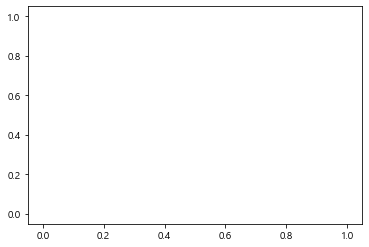

In [10]:
#추세 확인
sns.lineplot(data = df1, x = 'Datetime', y = '구매금액', estimator = sum)

In [11]:
p1 = pd.pivot_table(data=df1, 
               index='Datetime', 
               values = '구매금액', aggfunc = 'sum').reset_index()

In [12]:
p1

,Datetime,구매금액
0,2018-04-20,100920
1,2018-05-06,26500
2,2018-05-14,20600
3,2018-08-12,75700
4,2018-09-01,48300
...,...,...
584,2020-08-03,27560340
585,2020-08-04,31832500
586,2020-08-05,27683180
587,2020-08-06,22574070


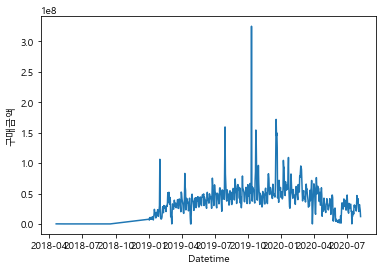

In [13]:
sns.lineplot(data=p1, x='Datetime', y='구매금액')

In [14]:
p2 = pd.pivot_table(data=df1, 
               index=['Datetime', '물품대분류'], 
               values = '구매금액', aggfunc = 'sum').reset_index()

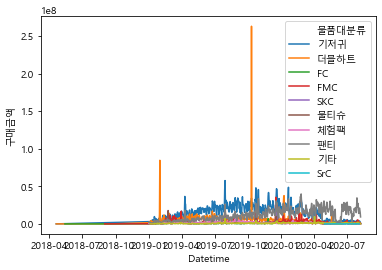

In [15]:
sns.lineplot(data = p2, x= 'Datetime', y='구매금액', hue = '물품대분류')

In [16]:
cond1 = df1['물품대분류'] == '기저귀'
df2 = df1.loc[cond1].iloc[1:]
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_Week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


**ARIMA (Auto Regressive Integrated Moving Average Model)**

* AR (Auto Regressive Model) : 자기회귀모델
    - p 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 자기회귀모델
    - 변동이 큰 자료들에 대해 설명력이 많이 떨어짐

    - ACF : 자기상관함수 / 특정 구간 내 데이터 간 상관관계
        - 특정 도시에 교회 숫자가 증가하고 있음 -> 범죄율도 증가함.
            - 둘이 상관관계가 있다는 잘못된 결론을 지을 수 있음
                - 인구수 증가에 따라 교회 증가, 범죄 증가한 것임
                    인구라는 요인을 고려하지 않고 계산하면 상관관계가 큰 것으로 나오기 때문에, 두 개의 독립변수가 상관관계가 있게 나올 수도 있음
                    
    - PACF : 부분자기상관함수
        - 교회와 범죄 사이에 관련성이 있는지 확인할 수 있음

* MA (Moving Average Model) : 이동평균모델
    - 일정한 구간 데이터의 평균을 계산해, 미래를 예측하는 모델
    - 특정 데이터 평균을 통해 불규칙적 데이터를 제거할 수 있음

* Difference (차분)
- 평균이나 분산이 변하지 않고 일정한 정상적인 데이터에 대해서 시계열 분석을 할 수 있음
- 실무에선 대부분 비정상적이기 때문에 차분을 실시해서 정상화 해야 함


**ARIMA Model**

- 단기예측에 적합
- 계절적 변동요인(주기적 변동)
- Sample > 50
- 정성적 자료에 대해서 분석
    -> 비정성적일 경우 차분을 이용해 모델 사용 가능

In [17]:
import statsmodels.tsa.api as tsa

In [18]:
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_Week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


In [22]:
df_time2 = pd.pivot_table(data = df2, index = 'Datetime'
                          , values = '구매금액', aggfunc = 'sum').reset_index()
df_time2.set_index("Datetime")

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680
...,...
2020-08-03,3075900
2020-08-04,4010200
2020-08-05,2937800


In [23]:
df_time = pd.pivot_table(data=df2, index='Datetime', values = '구매금액', aggfunc = 'sum')
df_time.head()

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680


In [30]:
y = df_time['구매금액'].resample('1D').mean()

In [31]:
y.isnull().sum()

7

In [34]:
y1 = y.fillna(method = 'ffill') #b : before, f : foward

In [37]:
import matplotlib.pyplot as plt

* 시계열 분해
    - Trend (추세요인)
    - Seasonality (계절요인)
    - Cycle / Residual (불규칙요인)

In [39]:
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


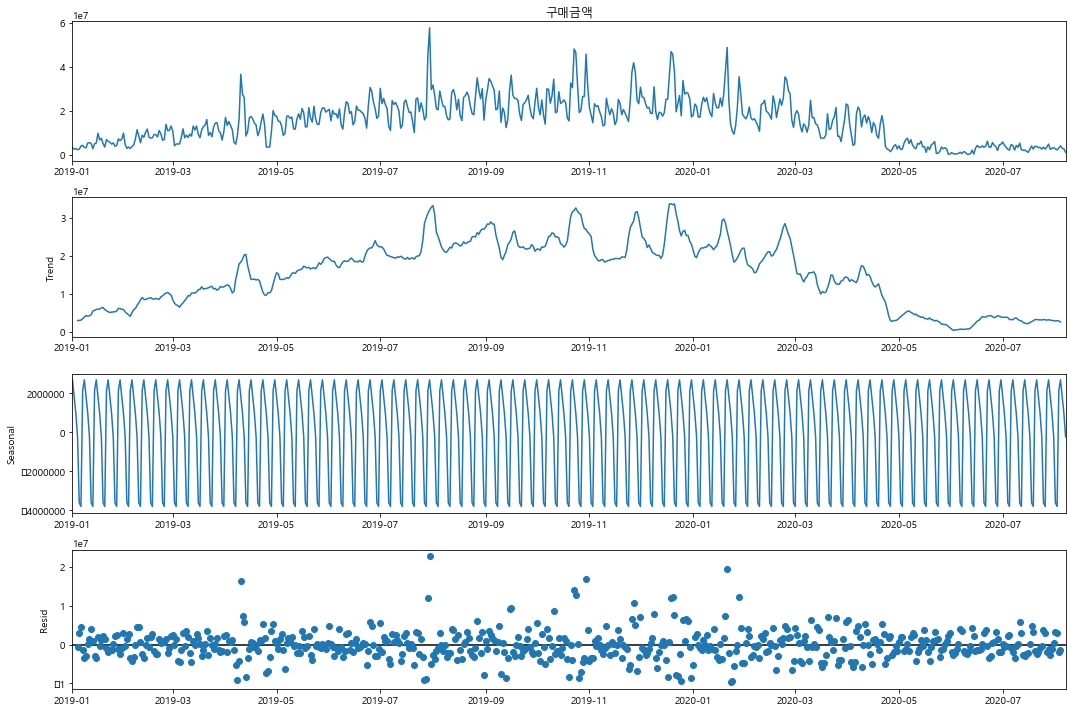

In [40]:
#시계열 모델
model_series = tsa.seasonal_decompose(y1, model = 'additive')
#모델 시각화
fig = model_series.plot()
plt.show()

In [41]:
import itertools

In [47]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p , d, q)) # p : 몇일 전 ? d: 차분
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [48]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [43]:
param_list = []
param_seasonal_list = []
result_AIC_list = []

In [45]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y1, order = param,
                                         seasonal_order = param_seasonal,
                                         enforece_stationarity = False,
                                         enforce_invertibility= False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            result_AIC_list.append(results.aic)
        except:
            continue

In [49]:
ARIMA_list = pd.DataFrame({'Parameter' : param_list, 'Seasonal' : param_seasonal_list, 'AIC' :  result_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

**Likelihood (최대우도) : 특정 데이터가 모수로부터 추출되었을 가능도**
- 특정 값에 대한 분포의 확률 추정 (연속 확률 밀도 함수 pdf의 y값)

- **AIC (Akaike Information Criterion) : 데이터에 대한 모델의 상대적 품질**
    - AIC = -2 ln(L) + 2k
    - 값이 낮을수록 모형 적합도가 높은 것을 의미

- **BIC (bayes Information Criterion)**
    - Bic = -2 ln(L) + log(n)p
    - 변수가 더 많은 경우, AIC에 더 많은 패널티를 부여해 계산
    

- **HQIC (Hannan Quinn Information Criterion)**
    - HQIC = -2 ln(L) + 2k ln(ln(n))    

In [53]:
ARIMA_list.sort_values(by = 'AIC')

,Parameter,Seasonal,AIC
43,"(1, 0, 1)","(0, 1, 1, 12)",19454.499198
47,"(1, 0, 1)","(1, 1, 1, 12)",19454.869618
23,"(0, 1, 0)","(1, 1, 1, 12)",19468.925111
39,"(1, 0, 0)","(1, 1, 1, 12)",19482.426853
35,"(1, 0, 0)","(0, 1, 1, 12)",19482.483365
...,...,...,...
12,"(0, 0, 1)","(1, 0, 0, 12)",20690.529428
9,"(0, 0, 1)","(0, 0, 1, 12)",20741.512537
8,"(0, 0, 1)","(0, 0, 0, 12)",20816.312296
1,"(0, 0, 0)","(0, 0, 1, 12)",20953.280823


In [59]:
mod = tsa.statespace.SARIMAX(y1, order = (0, 1, 1), seasonal_order = (0, 1, 1, 12),
                            enforce_stationarity = False, enforce_invertibility = False)

results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               구매금액   No. Observations:                  585
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -9521.297
Date:                            Mon, 02 May 2022   AIC                          19048.594
Time:                                    15:57:11   BIC                          19061.567
Sample:                                01-01-2019   HQIC                         19053.660
                                     - 08-07-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0721      0.063     -1.137      0.256      -0.196       0.052
ma.S.L12      -0.9948      0.022   

- Order (p, d, q), Seasonal Order (P, D, Q, M)
    - p : AR에서의 p값(p구간 내 데이터 사이의 상관관계)
    - d : 차분
    - q : q MA PCAF 편상관계수 q 값
    - P : 계절성 패턴 p구간 내의 상관관계 
    - D : 계절성 여부(1, 0)
    - Q : ACF 함수 기준으로 계절성이 얼마나 반복되는지
    - M : 주기가 어느정도 되는지

- Ljung - Box Test : 일정 기간동안 관측치가 랜덤이고, 독립인지 여부 검정
    - 귀무 : 데이터가 상관관계를 나타내지 않음
    - 대립 : 데이터가 상관관계를 나타낸다
    - P.value(귀무가설이 참일 확률) < 0.05 (유의 수준) -> 대립가설 참

- Jarque Bera Test : 왜도와 첨도(각각 얼마나 뾰족한지, 얼마나 한쪽으로 쏠려있는지)가 정규분포와 일치하는지 가설검정
    - SARIMAX : 잔차의 분포가 정규분포 인가 ?
    - 귀무 가설 : 해당 잔차(residual)는 정규분포와 일치한다.
    - 대립 가설 : 해당 잔차(residual)는 정규분포와 일치하지 않는다.
    - P.value < 0.05, 해당 분포는 정규분포를 띄지 않는다.